# Exploratory Data Analysis for r/india posts

The data collection is done in the file `data-collection.ipynb`, which exports a file `submissions.txt` with all the collected posts from the india subreddit. The data is imported here using the pickle module.

In [1]:
import pickle

submissions = []

with open('submissions.txt', 'rb') as fp:
    submissions = pickle.load(fp)

A total of 760 submissions were collected due to Reddit rate limits. These submissions were from the 'hot' section of the indian subreddit.

# Dates of collected submissions

In [10]:
import datetime
def get_date(submission):
    time = submission.created
    return datetime.date.fromtimestamp(time)

In [62]:
dates = []
for submission in submissions:
    dates.append(get_date(submission))

dateDict = {}
for date in dates:
    if date not in dateDict:
        dateDict[date] = 1
    else:
        dateDict[date] += 1
        
dates = list(dateDict.keys())
freq = list(dateDict.values())
print(dates, freq)

[datetime.date(2020, 4, 16), datetime.date(2020, 4, 12), datetime.date(2020, 4, 27), datetime.date(2020, 4, 26), datetime.date(2020, 4, 28), datetime.date(2020, 4, 25), datetime.date(2020, 4, 24), datetime.date(2020, 4, 23), datetime.date(2020, 4, 22)] [1, 1, 179, 170, 12, 164, 183, 49, 1]


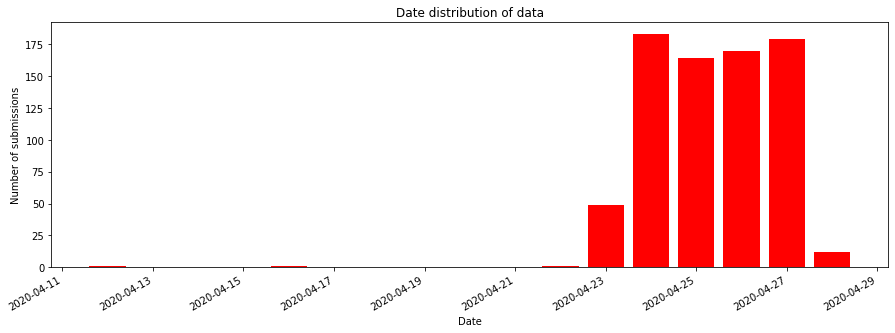

In [74]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(dates, freq, color='red')
fig.autofmt_xdate()
plt.title('Date distribution of data')
plt.xlabel('Date')
plt.ylabel('Number of submissions')
plt.show()

Most of the submissions were published between April 23 and April 28, 2020.

## Flair distribution in sample

In [2]:
flairs = {}

for submission in submissions:
    submissionFlair = submission.link_flair_text
    if submissionFlair is not None:
        if submissionFlair not in flairs:
            flairs[submissionFlair] = 1
        else:
            flairs[submissionFlair] += 1

flairs = {k: v for k, v in sorted(flairs.items(), key=lambda item: item[1], reverse=True)}

print(flairs)

{'Coronavirus': 269, 'Politics': 119, 'Non-Political': 113, 'AskIndia': 107, 'Policy/Economy': 58, 'Business/Finance': 24, 'Science/Technology': 17, 'Photography': 16, 'Food': 14, 'Scheduled': 8, 'CAA-NRC-NPR': 7, 'Sports': 3, 'Official Announcement': 1, 'TIL': 1}


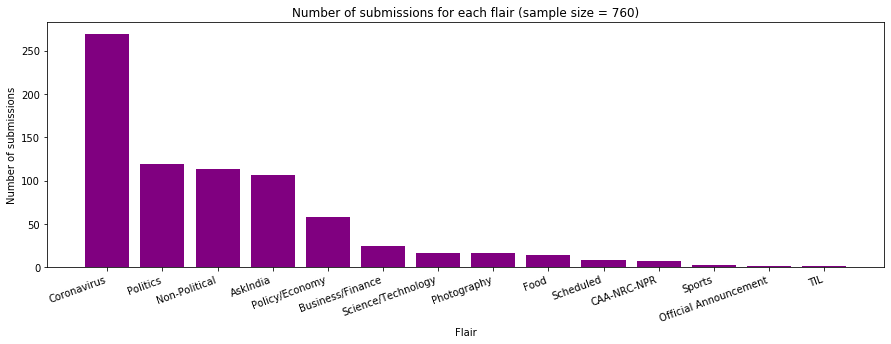

In [82]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
fig.autofmt_xdate(rotation=20)
plt.bar(flairs.keys(), flairs.values(), color='purple')
plt.title('Number of submissions for each flair (sample size = ' + str(len(submissions)) + ')')
plt.xlabel('Flair')
plt.ylabel('Number of submissions')
plt.show()

As seen in the figure above, about one-third of the submissions in the sample belong to the Coronavirus flair, which is unsurprising during the current COVID-19 pandemic. After that, Politics-related, Non-Political, and AskIndia are the most popular categories for posts. The Official Announcement flair almost has the lowest number of submissions, which is to be expected because these posts are rare and most likely come from moderators.

## Analysis of comments and upvotes for submissions in each flair

In [4]:
from statistics import mean, median

commentsPerFlair = {}
upvotesPerFlair = {}

for submission in submissions:
    submissionFlair = submission.link_flair_text
    numComments = submission.num_comments
    score = submission.score
    if submissionFlair is not None:
        if submissionFlair not in commentsPerFlair:
            commentsPerFlair[submissionFlair] = [numComments]
            upvotesPerFlair[submissionFlair] = [score]
        else:
            commentsPerFlair[submissionFlair] += [numComments]
            upvotesPerFlair[submissionFlair] += [score]

            from statistics import mean, median

In [5]:
meanCommentsPerFlair = {}
medianCommentsPerFlair = {}

for k, v in commentsPerFlair.items():
    meanCommentsPerFlair[k] = mean(v)
    medianCommentsPerFlair[k] = median(v)

meanCommentsPerFlair = {k: v for k, v in sorted(meanCommentsPerFlair.items(), key=lambda item: item[1], reverse=True)}
medianCommentsPerFlair = {k: v for k, v in sorted(medianCommentsPerFlair.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
meanUpvotesPerFlair = {}
medianUpvotesPerFlair = {}

for k, v in upvotesPerFlair.items():
    meanUpvotesPerFlair[k] = mean(v)
    medianUpvotesPerFlair[k] = median(v)

meanUpvotesPerFlair = {k: v for k, v in sorted(meanUpvotesPerFlair.items(), key=lambda item: item[1], reverse=True)}
medianUpvotesPerFlair = {k: v for k, v in sorted(medianUpvotesPerFlair.items(), key=lambda item: item[1], reverse=True)}

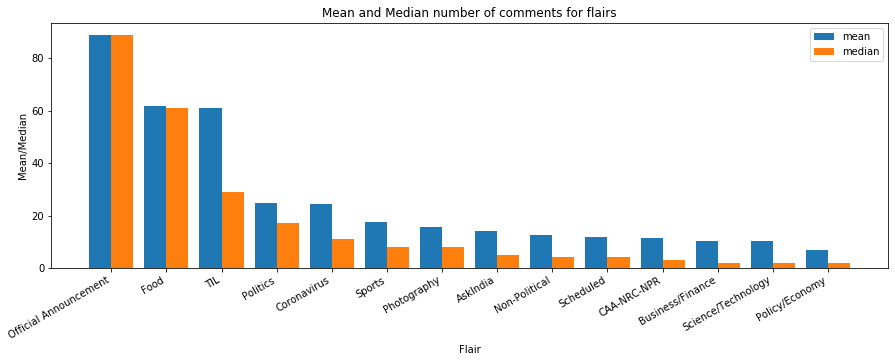

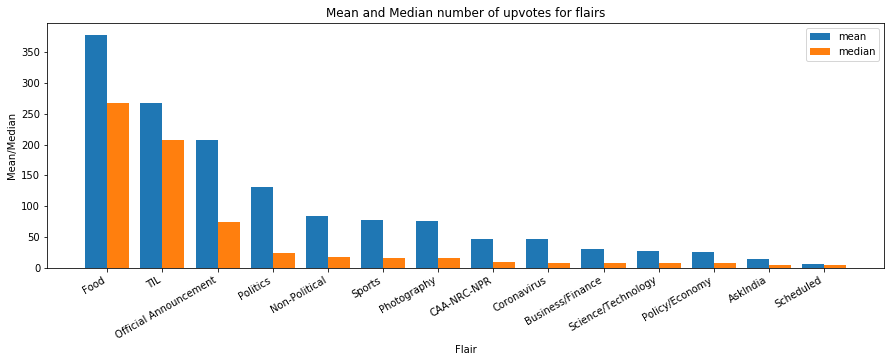

In [50]:
from matplotlib import pyplot as plt
import numpy as np

def plotBar(labels, means, medians, str):
    x = np.arange(len(labels))
    width = 0.40

    fig, ax = plt.subplots(figsize=(15,5))
    ax.bar(x - width/2, means, width, label='mean')
    ax.bar(x + width/2, medians, width, label='median')
    ax.set_xlabel('Flair')
    ax.set_ylabel('Mean/Median')
    ax.set_title('Mean and Median number of '+ str +' for flairs')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    fig.autofmt_xdate(rotation=30)
    plt.legend()
    plt.show()

plotBar(
    list(meanCommentsPerFlair.keys()),
    list(meanCommentsPerFlair.values()),
    list(medianCommentsPerFlair.values()),
    'comments'
)

plotBar(
    list(meanUpvotesPerFlair.keys()),
    list(meanUpvotesPerFlair.values()),
    list(medianUpvotesPerFlair.values()),
    'upvotes'
)    

The 2 graphs above show the mean and median comments and upvotes for each flair in the data. For almost each flair, the median is significantly lower than the mean, implying the number of comments and upvotes is skewed. Most submissions get a low number of comments of upvotes, but if a submission becomes trending or hot, it gets a lot of comments and upvotes.

We previously saw that the Official Announcement flair had one of the lowest number of submissions. However, in these 2 graphs, we can see that submissions belonging to this flair had the highest mean and median comments and very high mean and median upvotes as compared to other flairs.

Food, TIL, and Politics are also popular flairs.